## Pregunta 2
##### (g) Finalmente, encuentre estadísticos $\hat{a}$ y $\hat{b}$ tal que
$$
\mathbb{P}(\hat{a} \leq \theta \leq \hat{b})=1-\alpha
$$
donde $0<\alpha<1$.

***Solución***

In [1]:
# Importando ibrerías
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sympy as sp
from IPython.display import Latex, display_latex

In [2]:
def pretty_print(str):
    return display_latex(Latex(str))

##### Gráfico de la distribución exponencial  $X_i\sim \text{Exp}(\lambda = 0.5)$

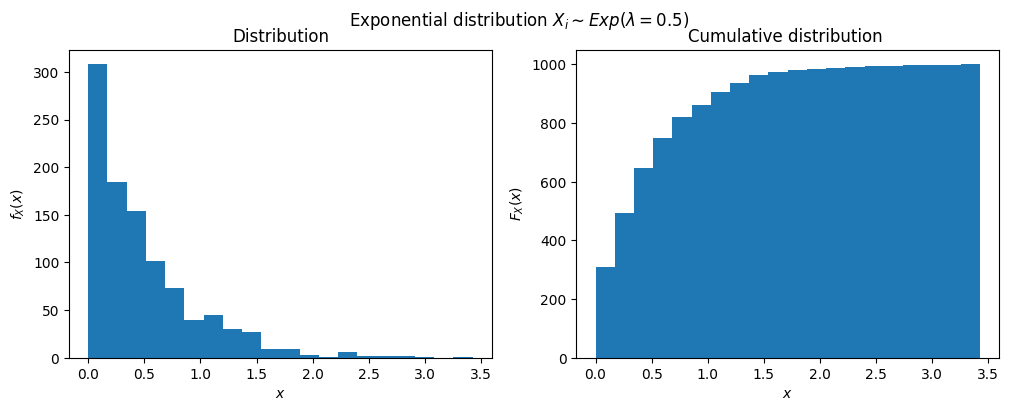

In [3]:
# Tamaño de la muestra
N = 1000

# X1, X2, ..., xn
x_sample = np.random.exponential(scale=1/2, size=N)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("Exponential distribution $X_i\sim Exp(\lambda = 0.5)$")

axes[0].set_title("Distribution")
axes[0].hist(x_sample, bins=20)
axes[0].set_xlabel("$x$")
axes[0].set_ylabel("$f_X(x)$")

axes[1].set_title("Cumulative distribution ")
axes[1].hist(x_sample, bins=20, cumulative=True)
axes[1].set_xlabel("$x$")
axes[1].set_ylabel("$F_X(x)$")
plt.show()


##### Función de repartición empírica

$$\hat \theta = \frac{1}{n}\sum_{i=1}^n I_{\{a\le X_i \le b\}}$$

In [4]:
def empirical_distribution_function(sample: np.ndarray, a: float, b: float):
    count = 0
    n = len(sample)
    for x in sample:
        if a <= x <= b:
            count += 1
    return count/n


##### Estimadores

In [5]:
# datos iniciales
a = 1
b = 3
alpha = 0.05
n = len(x_sample)

# estimadores
theta_hat = empirical_distribution_function(x_sample, a, b)
sigma_hat = np.sqrt(1/n*theta_hat*(1 - theta_hat))

# quantil normal
q = scipy.stats.norm.ppf(1 - alpha/2)

pretty_print(f"$$\hat \\theta = {theta_hat}, \quad \hat \\sigma = {sigma_hat}$$")

##### Estadísticos 

$$\hat a = \hat\theta -  q_{1 - \frac{\alpha}{2}} \hat \sigma, \quad \hat b = \hat\theta +  q_{1 - \frac{\alpha}{2}}\hat \sigma$$

Donde $q$ es el quantil de una distribución normal centrada y reducida, y $\alpha=0.05$

In [6]:
a_hat = theta_hat - q*sigma_hat
b_hat = theta_hat + q*sigma_hat

pretty_print(f"$\hat a = {a_hat}, \quad \hat b = {b_hat}$")


In [7]:
pretty_print(f"$\hat \\theta  = {theta_hat}$")


Se verifica que $\hat a \le \hat \theta \le \hat b$, con probabilidad $0.95$